
> ```---
title: CNN's with Keras
duration: "1:25"
creator:
    name: David Yerrington and Kiefer Katovich
    city: SF
---```


<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 10px">

# CNN's with Keras
Week 11 | Lesson 4.3

![](https://snag.gy/mXtRG6.jpg)

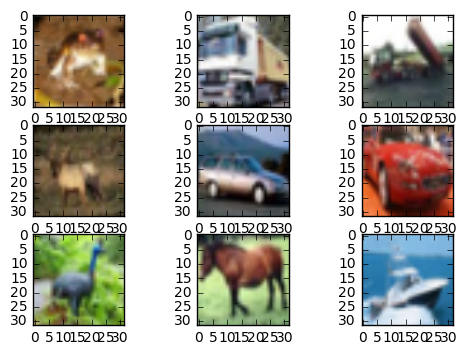

In [14]:
%matplotlib inline

from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))

# show the plot
pyplot.show()

## Extensive Imports

In [15]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils
from keras import backend as K

import pandas as pd

K.set_image_dim_ordering('th') # Sets the value of the image dimension ordering convention

## For reproducability

In [16]:
# fix random seed for reproducibility
seed = 42  # Why 42?  https://snag.gy/UAPdwN.jpg
numpy.random.seed(seed)

In [17]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [18]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


In [19]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## A few parameters

<style>
.no-border:table, th, td {
    border: none;
    border-left: none;
    border-right: none;
    margin: 10px;
    padding: 10px;
}
.padded-cell {
    padding: 15px !important;
}
</style>
<!-- padded cell class isn't being applied so this is doubled.. it's possible, but requires research -->
<table class="no-border" style="border-left: none; border-right: none; padding: 10px; border-bottom: none;">
<tbody class="no-border" style="border-left: none; border-right: none; padding:10px; border-bottom: none;"><tr class="no-border" style=" background: #000000; color: #FFFFFF;"><th>Parameter</th><th style="border: none; text-align: center;">Definition</th></tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none; padding: 15px " class="padded-cell"> <b>Relu</b> (<i>param</i>) </td>
  <td style="border-right: none; padding: 15px " class="padded-cell"> Rectified linear unit activation.  Only used for hidden layers. [<i class="fa fa-external-link" aria-hidden="true"></i> source](http://eprints.pascal-network.org/archive/00008596/01/glorot11a.pdf). </td>
</tr>
<tr style="border-left: none; border-right: none;">
  <td style="border-left: none; padding: 15px" class="padded-cell"> <b>W_constraint</b> (<i>param</i>) </td>
  <td style="border-right: none; padding: 15px;" class="padded-cell"> For the main weights matrix. Can be "maxnorm", "nonneg", or "unitnorm". </td>
</tr>
<tr style="border-left: none; border-right: none; border-bottom: none;">
  <td style="border-left: none; padding: 15px; border-bottom: none;" class="padded-cell"> <b>border_mode</b> (<i>param</i>) </td>
  <td style="border-right: none; padding: 15px; border-bottom: none;" class="padded-cell"> Tells our network how the values should look between in and out.  "same" means the input _should_ be the same size as the output. </td>
</tr>

</tbody></table>


In [20]:
# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# "Compile" model
epochs   =  4
lrate    =  0.01
decay    =  lrate/epochs

sgd      =  SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 32, 32, 32)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 32, 32, 32)    9248        dropout_3[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 32, 16, 16)    0           convolution2d_4[0][0]            
___________________________________________________________________________________________

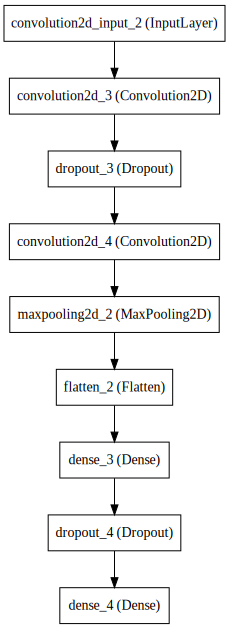

In [21]:
from keras.utils.visualize_util import model_to_dot
from IPython.display import SVG

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Convolutional Layer
![](https://snag.gy/mVduGW.jpg)

# Pooling
Reducing neighboring features from map into max single values.  Performing this operation over several iterations allows us to arrive at a "equivariant" version of our image.  This is how the model can detect objects in an image no matter where they are.
![](https://snag.gy/Mp9CZb.jpg)
>_Pooling in action_
>![](http://ufldl.stanford.edu/tutorial/images/Pooling_schematic.gif)

In [22]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 769s - loss: 1.7183 - acc: 0.3779 - val_loss: 1.4616 - val_acc: 0.4829

# VGG16 Pre-trained Model

This model is 500MB, and is located here on [Google Drive](https://docs.google.com/uc?id=0Bz7KyqmuGsilT0J5dmRCM0ROVHc&export=download). 

>_"VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the [Visual Geometry Group from Oxford](http://www.robots.ox.ac.uk/~vgg/research/very_deep/), who developed it. It was used to win the ILSVR (ImageNet) competition in 2014."_

In [23]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
import matplotlib.pyplot as plt

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [50]:
im = cv2.resize(cv2.imread('kiefer.jpg'), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

# Test pretrained model
model = VGG_16('vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')
out = model.predict(im)
print np.argmax(out)

841


## What does this VGG look like with our Keras configured CNN?

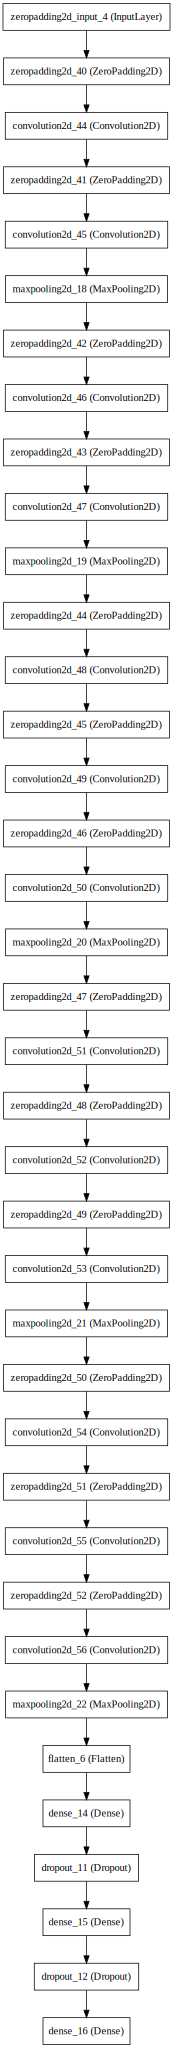

In [51]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Predicted label(s):  ['sweatshirt']


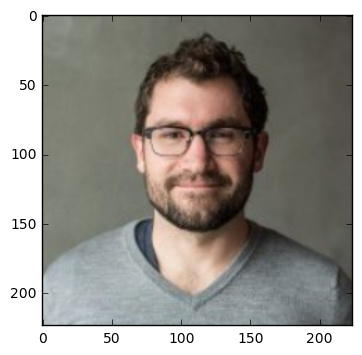

In [55]:
im_original = cv2.resize(cv2.imread('kiefer.jpg'), (224, 224))
im = im_original.transpose((2,0,1))
aim = np.expand_dims(im, axis=0)
im_converted = cv2.cvtColor(im_original, cv2.COLOR_BGR2RGB)
plt.imshow(im_converted)
print "Predicted label(s): ", vgg_labels[vgg_labels.index == class_prediction[0]]['label'].values

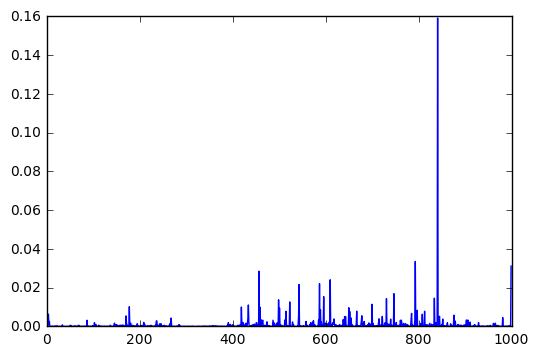

In [52]:
# out = model.predict(im)
plt.plot(out.ravel())

In [53]:
class_prediction = model.predict_classes(im)
class_prediction

1/1 [==============================] - 2s


array([841])

### This synset file has the class labels for VGG16
> _This was actually kind of hard to find but these labels should match up to the class prediction as ordinals._

In [54]:
with open("synset_words.txt") as fp:
    synset_contents = fp.read()

class_labels_data = [{
    "line": index, 
    "id": line[0:9], 
    "label": line[10:]
} for index, line in enumerate(synset_contents.split("\n"))
]

vgg_labels = pd.DataFrame(class_labels_data)

## Prototype Function for this prediction pipeline

In [59]:
def predict_image(img_src = 'kiefer.jpg', vgg_labels = vgg_labels):
    
    # transpose image to size
    im = cv2.resize(cv2.imread(img_src), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)

    # Test pretrained model
    model = VGG_16('vgg16_weights.h5')
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy') # more info: https://keras.io/objectives/
    out = model.predict(im)
    
    class_prediction = model.predict_classes(im)
    
    print np.argmax(out)
    
    # di
    im_original = cv2.resize(cv2.imread(img_src), (224, 224))
    im = im_original.transpose((2,0,1))
    aim = np.expand_dims(im, axis=0)
    im_converted = cv2.cvtColor(im_original, cv2.COLOR_BGR2RGB)
    plt.imshow(im_converted)
    print "Predicted label(s): ", vgg_labels[vgg_labels.index == class_prediction[0]]['label'].values

1/1 [==============================] - 3s
933
Predicted label(s):  ['cheeseburger']


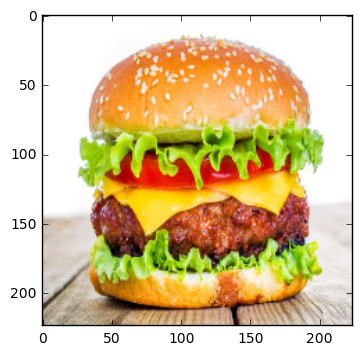

In [82]:
predict_image(img_src="./hamburger.jpg")